In [1]:
import string
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import gm

plt.style.use('default')

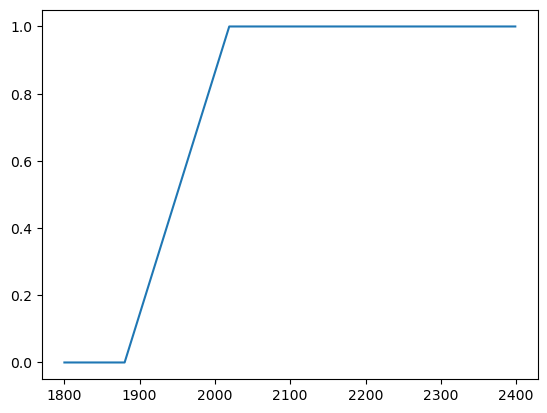

In [2]:
t = np.arange(1800, 2400)
trend_len = 140
pad_len = 80
melt_factor = -0.65
Tp = np.concatenate([np.zeros(pad_len), np.linspace(0, 1, trend_len), np.full(len(t)-trend_len - pad_len, fill_value=1)])
bp = Tp * melt_factor
params_3s = dict(
    Atot=10,
    W=1,
    L=10,
    bt=0,
    H=100,
    b_p=bp,
    ts=np.arange(0, len(t)),
)
tau25 = gm.gm3s(tau=25, **params_3s).run().to_pandas().reset_index()
tau75 = gm.gm3s(tau=75, **params_3s).run().to_pandas().reset_index()
tau100 = gm.gm3s(tau=100, **params_3s).run().to_pandas().reset_index()

fig, ax = plt.subplots(1,1)
ax.plot(t, Tp)

/var/folders/bb/wssqxcxj4tgg0s9fdw74731m0000gn/T/ipykernel_49571/299573003.py:63: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(wspace=0.35)


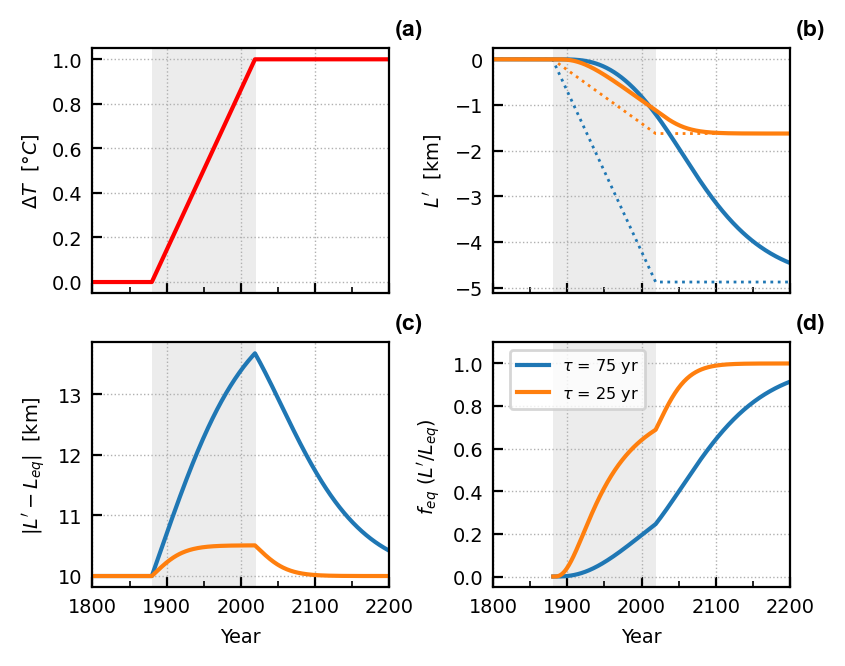

In [3]:
fig, ax = plt.subplots(2,2, figsize=(4.5,3.5), dpi=200, layout='constrained', sharex=True)

cmap = sns.color_palette("tab10", n_colors=10)

ax[0,0].plot(t, Tp, c='red')

ax[0,1].plot(t, (tau75.Lp_eq), ls=':', c=cmap[0], lw=1)
ax[0,1].plot(t, (tau25.Lp_eq), ls=':', c=cmap[1], lw=1)


ax[0,1].plot(t, (tau75.Lp), c=cmap[0],)
ax[0,1].plot(t, (tau25.Lp), c=cmap[1],)


ax[1,0].plot(t, tau75.L - tau75.Lp_eq, c=cmap[0],)
ax[1,0].plot(t, tau25.L - tau25.Lp_eq, c=cmap[1],)


tau25_feq = -tau25.Lp/(tau25.L[0] - tau25.Lp_eq)
ax[1,1].plot(t, tau75.Lp/(tau75.Lp_eq), label='$\\tau$ = 75 yr', c=cmap[0],)
ax[1,1].plot(t, tau25.Lp/(tau25.Lp_eq), label='$\\tau$ = 25 yr', c=cmap[1],)


ax[0,1].set_xlim(t[0], t[-1])
#ax[0].set_ylim(-0.2, 0.025)
ax[1,1].set_ylim(-0.05, 1)
#ax[1,1].legend(fontsize='xx-small')
ax[0,0].set_ylabel("$\Delta T$  [$\degree C$]", fontsize='x-small')
ax[0,1].set_ylabel("$L'$  [km]", fontsize='x-small')
ax[1,0].set_ylabel("$|L' - L_{eq}|$  [km]", fontsize='x-small')
ax[1,1].set_ylabel("$f_{eq}$ ($L'/L_{eq}$) ", fontsize='x-small')

# ax[0].yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
# ax[1].yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
# ax[2].yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))

for axis in ax.ravel():
    axis.set_xlim(1850, 2200)
    axis.xaxis.set_major_locator(mpl.ticker.MultipleLocator(100))
    axis.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(50))
    #ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(250))
    axis.grid(which='major', axis='both', ls=':', lw=0.5)
    #axis.grid(which='minor', axis='both', ls=':', lw=0.5, alpha=0.25)
    axis.tick_params(axis='both', which='both', direction='in', length=2, labelsize='x-small')
    axis.tick_params(axis='both', which='major', direction='in', length=3.5, labelsize='x-small')
    axis.set_xticks([1800, 1900, 2000, 2100, 2200], labels=[1800, 1900, 2000, 2100, 2200])
    axis.axvspan(1880, 2020, fc='grey', alpha=0.15)
    
ax[1,0].set_xlabel('Year', fontsize='x-small')
ax[1,1].set_xlabel('Year', fontsize='x-small')
ax[1,1].set_ylim(None, 1.1)
ax[1,1].legend(fontsize='xx-small', loc='upper left', bbox_to_anchor=(0.03, 1))

# label subplots
sp_labels = ['(' + letter + ')' for letter in string.ascii_lowercase]
for i, axis in enumerate(ax.ravel()):
    # label physical distance in and down:
    trans = mpl.transforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
    #axis.text(0.975, 1.2, sp_labels[i], transform=axis.transAxes + trans,
    axis.text(0.925, 1.175, sp_labels[i], transform=axis.transAxes + trans,
              verticalalignment='top', fontsize='small', font='Arial', fontweight='bold')

plt.subplots_adjust(wspace=0.35)
plt.savefig(Path('Fig2.png'))
plt.savefig(Path('Fig2.svg'))